<a href="https://colab.research.google.com/github/Liekeverhoeven262/Master-Thesis-Data-Science-Society/blob/main/Gender_difference_%2B_confusion_matrices_error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Construct the path to the file in your Google Drive
personal_data_path = '/content/drive/My Drive/Master Thesis/FINAL_personal_data_compact3without.xlsx'
thermal_data_path = '/content/drive/My Drive/Master Thesis/FINAL_scaled_features_df_max.xlsx'
gender_path = '/content/drive/My Drive/Master Thesis/Gender.xlsx'

# Load the dataset
personal_data_df = pd.read_excel(personal_data_path)
thermal_data_df = pd.read_excel(thermal_data_path)
gender_df = pd.read_excel(gender_path)

In [ ]:
print(gender_df.head)

<bound method NDFrame.head of       ID  Gender
0      5       2
1      6       1
2      7       2
3      8       1
4      9       1
..   ...     ...
310  328       2
311  329       2
312  330       2
313  331       2
314  332       2

[315 rows x 2 columns]>


In [3]:
data = pd.merge(thermal_data_df, personal_data_df, on='ID')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, average_precision_score
from imblearn.over_sampling import SMOTE

In [5]:
features_with_cluster = ['Left Cheek Sum', 'Left Cheek Variance', 'Left Cheek Standard Deviation', 'Left Cheek Maximum',
            'Left Cheek Minimum', 'Left Cheek Median', 'Left Cheek Mean', 'Left Cheek Mean Absolute Change',
            'Left Cheek Maximum Slope', 'Left Cheek Minimum Slope', 'Right Cheek Sum', 'Right Cheek Variance',
            'Right Cheek Standard Deviation', 'Right Cheek Maximum', 'Right Cheek Minimum', 'Right Cheek Median',
            'Right Cheek Mean', 'Right Cheek Mean Absolute Change', 'Right Cheek Maximum Slope', 'Right Cheek Minimum Slope',
            'Below Nose Sum', 'Below Nose Variance', 'Below Nose Standard Deviation', 'Below Nose Maximum',
            'Below Nose Minimum', 'Below Nose Median', 'Below Nose Mean', 'Below Nose Mean Absolute Change',
            'Below Nose Maximum Slope', 'Below Nose Minimum Slope', 'Between Eyes Sum', 'Between Eyes Variance',
            'Between Eyes Standard Deviation', 'Between Eyes Maximum', 'Between Eyes Minimum', 'Between Eyes Median',
            'Between Eyes Mean', 'Between Eyes Mean Absolute Change', 'Between Eyes Maximum Slope',
            'Between Eyes Minimum Slope', 'Chin Sum', 'Chin Variance', 'Chin Standard Deviation', 'Chin Maximum',
            'Chin Minimum', 'Chin Median', 'Chin Mean', 'Chin Mean Absolute Change', 'Chin Maximum Slope',
            'Chin Minimum Slope', 'Nose Sum', 'Nose Variance', 'Nose Standard Deviation', 'Nose Maximum',
            'Nose Minimum', 'Nose Median', 'Nose Mean', 'Nose Mean Absolute Change', 'Nose Maximum Slope',
            'Nose Minimum Slope', 'VVR1', 'VVR2', 'Cluster']

In [6]:
# One-hot encode 'Cluster'
data_with_cluster = pd.get_dummies(data, columns=['Cluster'], prefix='Cluster')

# Check new columns
print(data_with_cluster.columns)

Index(['ID', 'Left Cheek Sum', 'Left Cheek Variance',
       'Left Cheek Standard Deviation', 'Left Cheek Maximum',
       'Left Cheek Minimum', 'Left Cheek Median', 'Left Cheek Mean',
       'Left Cheek Mean Absolute Change', 'Left Cheek Maximum Slope',
       'Left Cheek Minimum Slope', 'Right Cheek Sum', 'Right Cheek Variance',
       'Right Cheek Standard Deviation', 'Right Cheek Maximum',
       'Right Cheek Minimum', 'Right Cheek Median', 'Right Cheek Mean',
       'Right Cheek Mean Absolute Change', 'Right Cheek Maximum Slope',
       'Right Cheek Minimum Slope', 'Below Nose Sum', 'Below Nose Variance',
       'Below Nose Standard Deviation', 'Below Nose Maximum',
       'Below Nose Minimum', 'Below Nose Median', 'Below Nose Mean',
       'Below Nose Mean Absolute Change', 'Below Nose Maximum Slope',
       'Below Nose Minimum Slope', 'Between Eyes Sum', 'Between Eyes Variance',
       'Between Eyes Standard Deviation', 'Between Eyes Maximum',
       'Between Eyes Minimum', 'Bet

In [7]:
# Include new cluster columns in the features list
features_with_cluster = data_with_cluster.columns.difference(['ID', 'Sum2']).tolist()  # Exclude 'ID' and 'Sum2' from features

# Define the target variable
target_with_cluster = 'Sum2'

In [8]:
# Split the data into training and test sets
X_train_with_cluster, X_test_with_cluster, y_train_with_cluster, y_test_with_cluster = train_test_split(
    data_with_cluster[features_with_cluster], data_with_cluster[target_with_cluster], test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote_with_cluster = SMOTE(random_state=42)
X_train_smote_with_cluster, y_train_smote_with_cluster = smote_with_cluster.fit_resample(X_train_with_cluster, y_train_with_cluster)

From hyperparameter tuning:
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters: {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.75}
Best recall: 0.8923351158645276

In [9]:
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score

# Setup the optimized XGBoost model using the best parameters from GridSearchCV
optimized_xgb_with_cluster = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.2,
    subsample=0.75,
    colsample_bytree=0.75,
    gamma=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model on the balanced training set
optimized_xgb_with_cluster.fit(X_train_smote_with_cluster, y_train_smote_with_cluster)

# Predict on the test data
predictions_optimized_with_cluster = optimized_xgb_with_cluster.predict(X_test_with_cluster)
probabilities_optimized_with_cluster = optimized_xgb_with_cluster.predict_proba(X_test_with_cluster)[:, 1]  # probabilities for the positive class

# Evaluate the model using classification report
print("XGBoost Model Classification Report With Cluster:")
print(classification_report(y_test_with_cluster, predictions_optimized_with_cluster, digits=2))

# Calculate specific metrics
precision_with_cluster = precision_score(y_test_with_cluster, predictions_optimized_with_cluster, pos_label=1)
recall_with_cluster = recall_score(y_test_with_cluster, predictions_optimized_with_cluster, pos_label=1)
auc_pr_with_cluster = average_precision_score(y_test_with_cluster, probabilities_optimized_with_cluster)

# Print specific metrics
print(f'Precisie: {precision_with_cluster:.6f}')
print(f'Recall: {recall_with_cluster:.2f}')
print(f'AUC-PR: {auc_pr_with_cluster:.6f}')

XGBoost Model Classification Report With Cluster:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.82      0.70      0.76        20

    accuracy                           0.86        63
   macro avg       0.85      0.82      0.83        63
weighted avg       0.85      0.86      0.85        63

Precisie: 0.823529
Recall: 0.70
AUC-PR: 0.792243


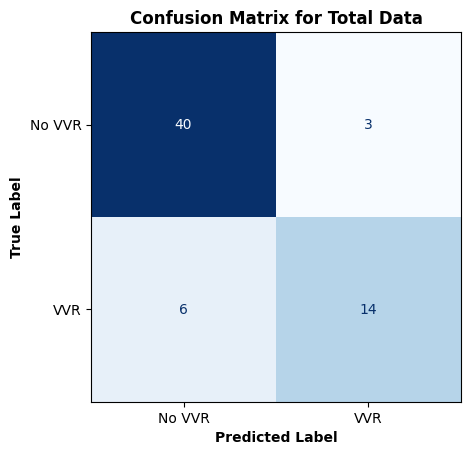

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test_with_cluster, predictions_optimized_with_cluster, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No VVR", "VVR"])

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
ax.set_title("Confusion Matrix for Total Data", fontweight='bold')
ax.set_xlabel("Predicted Label", fontweight='bold')
ax.set_ylabel("True Label", fontweight='bold')
plt.show()

## Gender Difference confusion matrix


In [12]:
data2 = pd.merge(thermal_data_df, personal_data_df, on='ID')
data = pd.merge(data2, gender_df, on='ID')

In [15]:
# One-hot encode 'Cluster'
data_with_cluster = pd.get_dummies(data, columns=['Cluster'], prefix='Cluster')

# Include new cluster columns in the features list
features_with_cluster = data_with_cluster.columns.difference(['ID', 'Sum2','Gender']).tolist()

# Define the target variable
target_with_cluster = 'Sum2'

In [14]:
print(features_with_cluster)

['Below Nose Maximum', 'Below Nose Maximum Slope', 'Below Nose Mean', 'Below Nose Mean Absolute Change', 'Below Nose Median', 'Below Nose Minimum', 'Below Nose Minimum Slope', 'Below Nose Standard Deviation', 'Below Nose Sum', 'Below Nose Variance', 'Between Eyes Maximum', 'Between Eyes Maximum Slope', 'Between Eyes Mean', 'Between Eyes Mean Absolute Change', 'Between Eyes Median', 'Between Eyes Minimum', 'Between Eyes Minimum Slope', 'Between Eyes Standard Deviation', 'Between Eyes Sum', 'Between Eyes Variance', 'Chin Maximum', 'Chin Maximum Slope', 'Chin Mean', 'Chin Mean Absolute Change', 'Chin Median', 'Chin Minimum', 'Chin Minimum Slope', 'Chin Standard Deviation', 'Chin Sum', 'Chin Variance', 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Left Cheek Maximum', 'Left Cheek Maximum Slope', 'Left Cheek Mean', 'Left Cheek Mean Absolute Change', 'Left Cheek Median', 'Left Cheek Minimum', 'Left Cheek Minimum Slope', 'Left Cheek Standard Deviation', 'Left Cheek Sum', 'Left Cheek Variance', 'Nos

In [16]:
# Split the data by gender
male_data = data_with_cluster[data_with_cluster['Gender'] == 1]
female_data = data_with_cluster[data_with_cluster['Gender'] == 2]

Male Confusion Matrix:


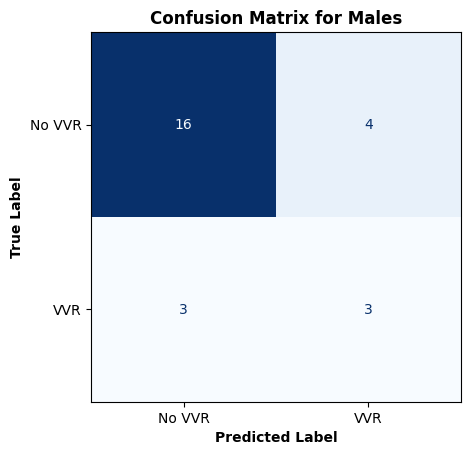

Female Confusion Matrix:


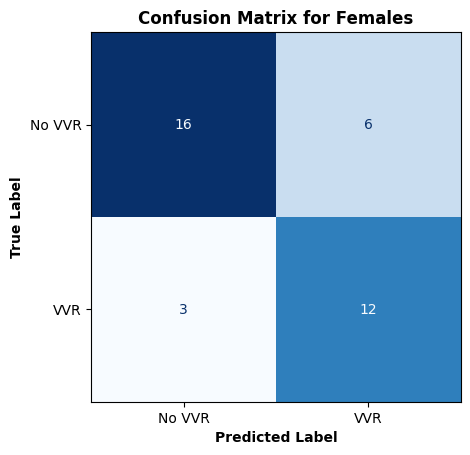

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold

def evaluate_gender_split(data_gender, features, target, gender_label):
    # Split the data into training and test sets
    X = data_gender[features]
    y = data_gender[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to the training set only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Setup the optimized XGBoost model
    optimized_xgb_with_cluster = XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.2,
        subsample=0.75,
        colsample_bytree=0.75,
        gamma=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluate the model using cross-validation
    for train_index, val_index in cv.split(X_train_smote, y_train_smote):
        X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
        y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]
        optimized_xgb_with_cluster.fit(X_train_fold, y_train_fold)

    # Train on the full training set and evaluate on the test set
    optimized_xgb_with_cluster.fit(X_train_smote, y_train_smote)

    # Predict on the test data
    predictions = optimized_xgb_with_cluster.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No VVR", "VVR"])

    # Plot the confusion matrix
    fig, ax = plt.subplots()
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix for {gender_label}", fontweight='bold')
    ax.set_xlabel("Predicted Label", fontweight='bold')
    ax.set_ylabel("True Label", fontweight='bold')
    plt.show()

# Evaluate the model for male and female donors separately
print("Male Confusion Matrix:")
evaluate_gender_split(male_data, features_with_cluster, target_with_cluster, 'Males')

print("Female Confusion Matrix:")
evaluate_gender_split(female_data, features_with_cluster, target_with_cluster, 'Females')

## Analysis male vs female

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, average_precision_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Load datasets
personal_data_path = '/content/drive/My Drive/Master Thesis/FINAL_personal_data_compact3without.xlsx'
thermal_data_path = '/content/drive/My Drive/Master Thesis/FINAL_scaled_features_df_max.xlsx'
gender_path = '/content/drive/My Drive/Master Thesis/Gender.xlsx'

personal_data_df = pd.read_excel(personal_data_path)
thermal_data_df = pd.read_excel(thermal_data_path)
gender_df = pd.read_excel(gender_path)

# Merge datasets
data = pd.merge(thermal_data_df, personal_data_df, on='ID')
data = pd.merge(data, gender_df, on='ID')

# One-hot encode 'Cluster'
data_with_cluster = pd.get_dummies(data, columns=['Cluster'], prefix='Cluster')

# Define features and target, excluding Gender
features_with_cluster = data_with_cluster.columns.difference(['ID', 'Sum2', 'Gender']).tolist()
target_with_cluster = 'Sum2'

# Split the data by gender
data_male = data_with_cluster[data_with_cluster['Gender'] == 1]
data_female = data_with_cluster[data_with_cluster['Gender'] == 2]

def evaluate_gender_split(data_gender, features, target, gender_label):
    # Split the data into training and test sets
    X = data_gender[features]
    y = data_gender[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to the training set only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Setup the optimized XGBoost model
    optimized_xgb_with_cluster = XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.2,
        subsample=0.75,
        colsample_bytree=0.75,
        gamma=0.1,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    # Evaluate the model using cross-validation
    for train_index, val_index in cv.split(X_train_smote, y_train_smote):
        X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
        y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]

        optimized_xgb_with_cluster.fit(X_train_fold, y_train_fold)

        # Predict and evaluate
        predictions = optimized_xgb_with_cluster.predict(X_val_fold)
        f1 = precision_score(y_val_fold, predictions, pos_label=1)
        f1_scores.append(f1)

    print(f"Cross-validated F1 scores for {gender_label}: {f1_scores}")
    print(f"Mean F1 score for {gender_label}: {np.mean(f1_scores):.2f}")

    # Train on full training set and evaluate on test set
    optimized_xgb_with_cluster.fit(X_train_smote, y_train_smote)

    # Predict on the test data
    predictions = optimized_xgb_with_cluster.predict(X_test)
    probabilities = optimized_xgb_with_cluster.predict_proba(X_test)[:, 1]

    print(f"XGBoost Model Classification Report for {gender_label}:")
    print(classification_report(y_test, predictions, digits=2))

    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    auc_pr = average_precision_score(y_test, probabilities)

    print(f'Precision: {precision:.6f}')
    print(f'Recall: {recall:.2f}')
    print(f'AUC-PR: {auc_pr:.6f}')
    print()

# Evaluate the model for male and female donors separately
evaluate_gender_split(data_male, features_with_cluster, target_with_cluster, 'Male')   # Male donors
evaluate_gender_split(data_female, features_with_cluster, target_with_cluster, 'Female')  # Female donors

Cross-validated F1 scores for Male: [0.9333333333333333, 0.875, 0.8888888888888888, 0.8421052631578947, 0.7777777777777778]
Mean F1 score for Male: 0.86
XGBoost Model Classification Report for Male:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.43      0.50      0.46         6

    accuracy                           0.73        26
   macro avg       0.64      0.65      0.64        26
weighted avg       0.75      0.73      0.74        26

Precision: 0.428571
Recall: 0.50
AUC-PR: 0.354053

Cross-validated F1 scores for Female: [0.7619047619047619, 0.6470588235294118, 0.8095238095238095, 0.8333333333333334, 0.7368421052631579]
Mean F1 score for Female: 0.76
XGBoost Model Classification Report for Female:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.67      0.80      0.73        15

    accuracy                           0.

In [ ]:
print(features_with_cluster)

['Below Nose Maximum', 'Below Nose Maximum Slope', 'Below Nose Mean', 'Below Nose Mean Absolute Change', 'Below Nose Median', 'Below Nose Minimum', 'Below Nose Minimum Slope', 'Below Nose Standard Deviation', 'Below Nose Sum', 'Below Nose Variance', 'Between Eyes Maximum', 'Between Eyes Maximum Slope', 'Between Eyes Mean', 'Between Eyes Mean Absolute Change', 'Between Eyes Median', 'Between Eyes Minimum', 'Between Eyes Minimum Slope', 'Between Eyes Standard Deviation', 'Between Eyes Sum', 'Between Eyes Variance', 'Chin Maximum', 'Chin Maximum Slope', 'Chin Mean', 'Chin Mean Absolute Change', 'Chin Median', 'Chin Minimum', 'Chin Minimum Slope', 'Chin Standard Deviation', 'Chin Sum', 'Chin Variance', 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Left Cheek Maximum', 'Left Cheek Maximum Slope', 'Left Cheek Mean', 'Left Cheek Mean Absolute Change', 'Left Cheek Median', 'Left Cheek Minimum', 'Left Cheek Minimum Slope', 'Left Cheek Standard Deviation', 'Left Cheek Sum', 'Left Cheek Variance', 'Nos

## Figure male vs female

In [ ]:
# Construct the path to the file in your Google Drive
VVRgender_path = '/content/drive/My Drive/Master Thesis/TotalVVR.xlsx'

# Load the dataset
VVRgender_df = pd.read_excel(VVRgender_path)

In [ ]:
print(VVRgender_df.head)

<bound method NDFrame.head of       ID  VVR  Gender
0      5   34       2
1      6   32       1
2      7   77       2
3      8   32       1
4      9   32       1
..   ...  ...     ...
310  328   35       2
311  329   35       2
312  330   35       2
313  331   38       2
314  332   57       2

[315 rows x 3 columns]>


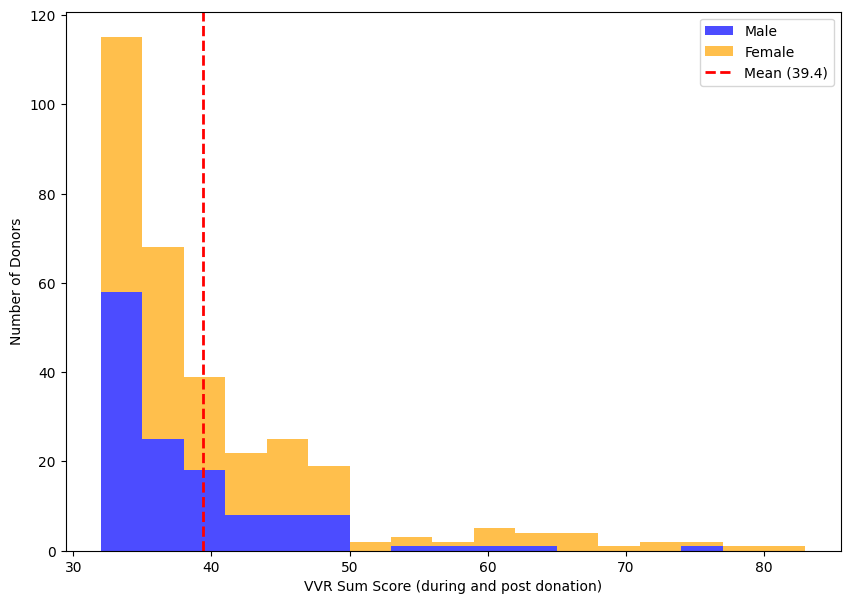

In [ ]:
import matplotlib.pyplot as plt

# Define the mean VVR sum score
mean_VVR_sum = 39.40

# Plot the stacked histogram
plt.figure(figsize=(10, 7))

# Define bins ranging from 32 to 84 (inclusive of 81)
bins = range(32, 84, 3)
plt.hist([VVRgender_df[VVRgender_df['Gender'] == 1]['VVR'], VVRgender_df[VVRgender_df['Gender'] == 2]['VVR']],
         bins=bins, alpha=0.7, label=['Male', 'Female'], color=['blue', 'orange'], stacked=True)

# Add a vertical line for the mean
plt.axvline(mean_VVR_sum, color='red', linestyle='--', linewidth=2, label=f'Mean ({mean_VVR_sum})')

# Add labels and title
plt.xlabel('VVR Sum Score (during and post donation)')
plt.ylabel('Number of Donors')
plt.legend()

# Show plot
plt.show()


In [ ]:
# Calculate variance for male and female VVR scores
variance_male = VVRgender_df[VVRgender_df['Gender'] == 1]['VVR'].var()
variance_female = VVRgender_df[VVRgender_df['Gender'] == 2]['VVR'].var()

print(f"Variance of VVR scores for males: {variance_male:.2f}")
print(f"Variance of VVR scores for females: {variance_female:.2f}")

Variance of VVR scores for males: 47.88
Variance of VVR scores for females: 103.00
